In [ ]:
#Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

<h3>Dataset Organization Functions</h3>
<p>The function <code>locate_data()</code> is going to be utilized to load the csv file that contains the data that will be utilized throughout the length of this tutorial. The dataset will returned at the end of the function.</p>

In [24]:
def locate_data():
    dataframe = pd.read_csv("./rdu_weather_history.csv")
    return dataframe

<p>The <code>clean_data(dataframe)</code> function accepts one argument (a dataset) and determines if there are any NULL values in the dataset. If there are NULL values in the dataset, the function will remove those entries from the dataset. The function will return the cleaned dataset.</p>

In [25]:
def clean_data(dataframe):
    if(dataframe.isnull().any().any()):
        clean_dataframe = dataframe.dropna()
        return clean_dataframe
    else:
        print("Dataset is clean.")
        return dataframe

<p>The function <code>export_csv(dataframe)</code> accepts one argment (a dataset) and allows the user to choose to export a clean version of the dataset for future use.</p>

In [26]:
def export_csv(dataframe):
    csv_choice = input("Do you wish to export a CSV file of clean data? Y or N\n")
    if(csv_choice == "Y"):
        dataframe.to_csv("rdu-weather-history-clean.csv")
    else:
        print("No export.")
    return

<p>The <code>start()</code> function is used run all the previous functions one after another. The function will return the dataframe originally obtained from the <code>locate_data()</code> function. The end of the dataset is printed to verify there are actual values in the dataset.</p>

In [27]:
def start():
    dataframe = locate_data()
    dataframe = clean_data(dataframe)
    export_csv(dataframe)
    print(dataframe.tail())
    return dataframe

<p>The dataset is being stored into the variable <code>pd_dataframe</code> for further use in the tutorial.</p>

In [28]:
pd_dataframe = start()

Do you wish to export a CSV file of clean data? Y or N N


No export.
            date  temperaturemin  temperaturemax  precipitation  snowfall  \
4525  2009-12-04            34.0            55.9           0.00       0.0   
4526  2009-12-13            36.0            42.1           0.29       0.0   
4527  2009-12-26            39.0            53.1           0.00       0.0   
4528  2009-12-28            30.9            46.0           0.00       0.0   
4529  2010-01-02            21.9            32.0           0.00       0.0   

      snowdepth  avgwindspeed  fastest2minwinddir  fastest2minwindspeed  \
4525        0.0          2.24                60.0                 10.07   
4526        0.0          2.91               250.0                  8.95   
4527        0.0          6.71               320.0                 10.07   
4528        0.0          8.05               260.0                 16.11   
4529        0.0          9.62               300.0                 19.91   

      fastest5secwinddir  ...  drizzle snow freezingrain smokehaze thunder 

<h3>Managing the Data</h3>
<p>For this tutorial, we want to use a time series in days, not a datetime object for our data. Therefore, we will utilize operations to transform the datetime object to an integer measurement corresponding to the amount of days after the initial start day of the data.</p>

In [33]:
pd_dataframe["date"]

0       2013-11-09
1       2013-11-12
2       2013-11-17
3       2013-11-18
4       2013-11-19
5       2013-11-28
6       2013-12-19
7       2013-12-21
8       2014-01-02
9       2014-01-11
10      2014-01-13
11      2014-01-15
12      2014-01-18
13      2014-01-19
14      2014-01-27
15      2014-02-08
16      2014-02-11
17      2014-02-14
18      2014-02-16
19      2014-02-19
20      2014-02-20
21      2014-03-03
22      2014-03-16
23      2014-03-17
24      2014-03-22
25      2014-03-31
26      2014-04-12
27      2014-04-15
28      2014-04-25
29      2014-04-27
           ...    
4500    2016-06-05
4501    2016-06-06
4502    2016-06-07
4503    2016-06-20
4504    2016-06-21
4505    2016-06-25
4506    2016-06-28
4507    2016-07-05
4508    2016-07-07
4509    2016-07-17
4510    2016-07-20
4511    2016-07-21
4512    2016-07-23
4513    2016-07-25
4514    2016-07-27
4515    2016-07-28
4516    2016-07-31
4517    2009-09-28
4518    2009-10-07
4519    2009-10-09
4520    2009-10-13
4521    2009

<p>First, finding the datetime object that is latest datetime object, and earliest datetime object.</p>

In [31]:
# Reference:http://www.datasciencemadesimple.com/get-minimum-value-column-python-pandas/
#Reference: https://stackoverflow.com/questions/23178129/getting-min-and-max-dates-from-a-pandas-dataframe
print(pd_dataframe["date"].max())

2019-05-26


In [32]:
print(pd_dataframe["date"].min())
min_date = pd_dataframe["date"].min()

2007-01-01


<h4>From Datetime Object to Measured Days</h4>
<p>The code below will iterate throughout the series of datetime objects. The datetime objects are placed into a list and said list is used to construct a pandas series to replace the datetime objects of the current dataframe.</p>
<p>For this to work, the Python datetime object must be loaded and ready for use.</p>

In [34]:
#Reference https://stackoverflow.com/questions/31687420/convert-datetime-datetime-object-to-days-since-epoch-in-python
#Reference:https://www.journaldev.com/23365/python-string-to-datetime-strptime
#Reference:https://stackoverflow.com/questions/1345827/how-do-i-find-the-time-difference-between-two-datetime-objects-in-python
#Reference:https://www.tutorialspoint.com/python_pandas/python_pandas_iteration.htm
import datetime
from datetime import timedelta
from datetime import datetime

numeric_dates = []
temp_date_series = pd_dataframe["date"]
for row, date in temp_date_series.iteritems():
    primary_date = datetime.strptime(date, "%Y-%m-%d")
    start_date = datetime.strptime(min_date, "%Y-%m-%d")
    relative_date = (primary_date - start_date).days
    date = int(relative_date)
    numeric_dates.append(date)
    print(date)
numeric_dates_series = pd.Series(numeric_dates)
pd_dataframe["date"] = numeric_dates_series

2504
2507
2512
2513
2514
2523
2544
2546
2558
2567
2569
2571
2574
2575
2583
2595
2598
2601
2603
2606
2607
2618
2631
2632
2637
2646
2658
2661
2671
2673
2678
2679
2683
2695
2697
2699
2703
2714
2716
2718
2730
2731
2733
2736
2737
2744
2749
2755
2758
2768
2769
2771
2776
2778
2781
2788
2792
2799
2800
2801
2804
2808
2813
2815
2817
2828
2830
2834
2836
2850
2855
2857
2859
2864
2866
2877
2887
2895
2905
2906
2907
2910
2911
2914
2916
2920
2922
2929
2931
2936
2938
2939
2943
2945
2954
2957
2964
2973
2978
2979
2982
2984
2989
2999
3019
3037
3064
3068
3085
3094
3100
3118
3129
3152
3154
3156
3177
3181
3184
3188
3191
3195
3197
3211
3215
3219
3232
3235
3237
3238
3240
3242
3243
3254
3258
3259
3264
3265
3273
3279
3280
3281
3289
3296
3299
3304
3310
3312
3316
3318
3320
3324
3328
3330
3333
3338
3340
3345
3349
3352
3356
3357
3362
3366
3372
3376
3389
3390
3392
3393
3400
3401
3414
3421
3432
3433
3447
3451
3462
3464
3481
3484
3486
3497
3507
3529
3536
3545
3548
3558
3559
3570
3572
3578
3583
3585
3597
3600
3603
3610


<p>We check the values of the date column to see if there are any values other than integers within the data. There are some NaN values that have appeared. We have a few options of how to handle such. We can remove the incomplete data, and work with the remainder of the data that is intact. Another solution is to attempt to find the reason as to why our datetime object to integer code produced NaN values for that portion of the data. For the purpose of this tutorial, we will remove the entries of data that have NaN values by running the <code>clean_data(dataframe)</code> function once again.</p>

In [36]:
pd_dataframe["date"]

0       2504.0
1       2507.0
2       2512.0
3       2513.0
4       2514.0
5       2523.0
6       2544.0
7       2546.0
8       2558.0
9       2567.0
10      2569.0
11      2571.0
12      2574.0
13      2575.0
14      2583.0
15      2595.0
16      2598.0
17      2601.0
18      2603.0
19      2606.0
20      2607.0
21      2618.0
22      2631.0
23      2632.0
24      2637.0
25      2646.0
26      2658.0
27      2661.0
28      2671.0
29      2673.0
         ...  
4500    1016.0
4501    1042.0
4502    1046.0
4503    1059.0
4504    1062.0
4505    1068.0
4506    1077.0
4507    1090.0
4508    1092.0
4509    1097.0
4510       NaN
4511       NaN
4512       NaN
4513       NaN
4514       NaN
4515       NaN
4516       NaN
4517       NaN
4518       NaN
4519       NaN
4520       NaN
4521       NaN
4522       NaN
4523       NaN
4524       NaN
4525       NaN
4526       NaN
4527       NaN
4528       NaN
4529       NaN
Name: date, Length: 4510, dtype: float64

In [37]:
pd_dataframe = clean_data(pd_dataframe)

In [38]:
pd_dataframe.columns

Index(['date', 'temperaturemin', 'temperaturemax', 'precipitation', 'snowfall',
       'snowdepth', 'avgwindspeed', 'fastest2minwinddir',
       'fastest2minwindspeed', 'fastest5secwinddir', 'fastest5secwindspeed',
       'fog', 'fogheavy', 'mist', 'rain', 'fogground', 'ice', 'glaze',
       'drizzle', 'snow', 'freezingrain', 'smokehaze', 'thunder', 'highwind',
       'hail', 'blowingsnow', 'dust', 'freezingfog'],
      dtype='object')

<p>It is possible that qualitative as well as quantitative data within your dataset. Whether determine such data to be relevant ot the development of your machine learning model is dependent on a number of factors outside of the development of the machine learning model itself. If you want to keep the categorical data, then one-hot should be applied so the model can have a numerical value to use. This can become tedious, and depending on how you apply the one-hot process to your data, you can end up with various biases in the machine learning model. For the sake of this tutorial, the next section of code will remove non-numerical data from our dataset to keep the tutorial simple. If you desire to learn more about one-hot and how to apply the concept to your categorical data, please feel free to reference <a href="https://datascience.stackexchange.com/questions/30215/what-is-one-hot-encoding-in-tensorflow?rq=1">https://datascience.stackexchange.com/questions/30215/what-is-one-hot-encoding-in-tensorflow?rq=1</a> as well as <a href="https://www.tensorflow.org/tutorials/keras/basic_regression">https://www.tensorflow.org/tutorials/keras/basic_regression</a> for further details. Note that transforming categorical data to a one-hot will allow that categorial data to play a role in the training of your machine learing model.</p>

In [39]:
pd_dataframe_numeric=pd_dataframe.select_dtypes(include=["number"])

In [40]:
pd_dataframe_numeric.tail()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed
4505,1068.0,71.1,84.9,0.00,0.0,0.0,6.26,50.0,16.11,60.0,23.04
4506,1077.0,71.1,78.1,1.25,0.0,0.0,4.70,230.0,12.08,200.0,17.00
4507,1090.0,73.0,95.0,0.42,0.0,0.0,6.71,240.0,31.09,240.0,38.92
4508,1092.0,73.0,93.0,0.06,0.0,0.0,7.61,240.0,23.04,260.0,31.09
4509,1097.0,68.0,90.0,0.00,0.0,0.0,4.03,210.0,14.09,220.0,16.11


In [41]:
#For more ways to split dataset for test and training https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
#Method used in the referenced tensorflow exmple is present in stackoverflow link
#Dividing dataset into trining and testing
training_set = pd_dataframe_numeric.sample(frac=0.9, random_state=0)
testing_set = pd_dataframe_numeric.drop(training_set.index)

In [42]:
training_set_statistics_inclusive = training_set.describe()
training_set_statistics_inclusive.pop("precipitation")
training_set_statistics = training_set_statistics_inclusive.transpose()

In [43]:
#Focusing on the precipitation as the focus of the linear regression
training_set_labels = training_set.pop("precipitation")
testing_set_labels = testing_set.pop("precipitation")

In [44]:
#Function for normailizing the data
def normalize_training(some_dataset):
    return (some_dataset-training_set_statistics["mean"])/training_set_statistics["std"]

In [45]:
normalized_training_set = normalize_training(training_set)
normalized_testing_set = normalize_training(testing_set)

In [98]:
def four_layer_regression():
    regression_model = tf.keras.models.Sequential()
    regression_model.add(tf.layers.Dense(32, activation = tf.nn.selu, input_shape=[len(training_set.keys())]))
    regression_model.add(tf.layers.Dense(32, activation = tf.nn.selu))
    regression_model.add(tf.layers.Dense(32, activation = tf.nn.selu))
    regression_model.add(tf.layers.Dense(32, activation = tf.nn.selu))
    regression_model.add(tf.layers.Dense(1))
    regression_optimizer = tf.keras.optimizers.Adadelta(0.001849)
    regression_model.compile(loss = "mean_squared_error", optimizer =regression_optimizer,metrics=['mean_absolute_error', 'mean_squared_error'])
    return regression_model

linear_regression_model = four_layer_regression()
    

In [99]:
linear_regression_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_42 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_43 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_44 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 33        
Total params: 3,553
Trainable params: 3,553
Non-trainable params: 0
_________________________________________________________________


In [100]:
#Check the datatype and number of outputs
example_run_batch = normalized_training_set[:20]
example_run_batch_output = linear_regression_model.predict(example_run_batch)
example_run_batch_output

array([[ 0.05829459],
       [-2.6251054 ],
       [-3.0540385 ],
       [-1.3039107 ],
       [ 2.3228216 ],
       [ 0.1495996 ],
       [-1.0863923 ],
       [ 1.4440355 ],
       [ 1.5698106 ],
       [-0.27269024],
       [-0.8373743 ],
       [ 0.17528564],
       [-0.19352522],
       [ 0.7388557 ],
       [-1.6415849 ],
       [ 1.5379251 ],
       [-0.03974953],
       [-0.7010495 ],
       [ 1.902088  ],
       [ 0.03526045]], dtype=float32)

In [101]:
#Number of iterations
training_epochs = 2000

In [102]:
regression_history = linear_regression_model.fit(normalized_training_set, training_set_labels, epochs = training_epochs, validation_split = 0.15, verbose=1)

Train on 3434 samples, validate on 607 samples
Epoch 1/2000
3434/3434 [==============================] - 0s 117us/sample - loss: 1.1717 - mean_absolute_error: 0.8646 - mean_squared_error: 1.1717 - val_loss: 1.1246 - val_mean_absolute_error: 0.8537 - val_mean_squared_error: 1.1246
Epoch 2/2000
3434/3434 [==============================] - 0s 36us/sample - loss: 1.0784 - mean_absolute_error: 0.8259 - mean_squared_error: 1.0784 - val_loss: 1.0364 - val_mean_absolute_error: 0.8160 - val_mean_squared_error: 1.0364
Epoch 3/2000
3434/3434 [==============================] - 0s 37us/sample - loss: 0.9917 - mean_absolute_error: 0.7880 - mean_squared_error: 0.9917 - val_loss: 0.9543 - val_mean_absolute_error: 0.7791 - val_mean_squared_error: 0.9543
Epoch 4/2000
3434/3434 [==============================] - 0s 36us/sample - loss: 0.9104 - mean_absolute_error: 0.7507 - mean_squared_error: 0.9104 - val_loss: 0.8776 - val_mean_absolute_error: 0.7429 - val_mean_squared_error: 0.8776
Epoch 5/2000
3434/34

In [106]:
regression_history_summary = pd.DataFrame(regression_history.history)
regression_history_summary.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
1995,0.098530,0.162981,0.098530,0.145618,0.192213,0.145618
1996,0.098519,0.162975,0.098519,0.145612,0.192201,0.145612
1997,0.098520,0.162975,0.098520,0.145597,0.192231,0.145597
1998,0.098515,0.162939,0.098515,0.145558,0.192308,0.145558
1999,0.098513,0.163014,0.098513,0.145579,0.192255,0.145579


In [95]:
import matplotlib.pyplot as plt

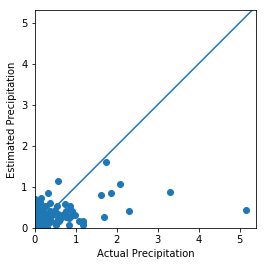

In [96]:
test_estimations = linear_regression_model.predict(normalized_testing_set).flatten()
plt.scatter(testing_set_labels, test_estimations)
plt.xlabel("Actual Precipitation")
plt.ylabel("Estimated Precipitation")
plt.axis("equal")
plt.axis("square")
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-50,50], [-50,50])

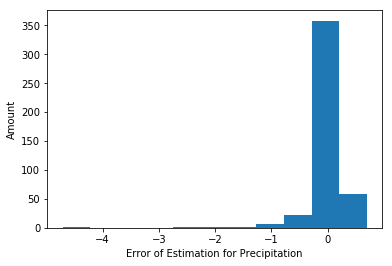

In [97]:
linear_regression_error = test_estimations - testing_set_labels
plt.hist(linear_regression_error, bins =11)
plt.xlabel("Error of Estimation for Precipitation")
_ = plt.ylabel("Amount")